In [73]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()

from scipy.stats import spearmanr
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [74]:
df = pd.read_csv('dados/archive/games.csv')
df.shape

(20058, 16)

In [75]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [76]:
df['winner'].unique()

array(['white', 'black', 'draw'], dtype=object)

In [77]:
df = df[['rated','turns','winner','opening_ply', 'white_rating', 'black_rating']]
df

,rated,turns,winner,opening_ply,white_rating,black_rating
0,False,13,white,5,1500,1191
1,True,16,black,4,1322,1261
2,True,61,white,3,1496,1500
3,True,61,white,3,1439,1454
4,True,95,white,5,1523,1469
...,...,...,...,...,...,...
20053,True,24,white,2,1691,1220
20054,True,82,black,2,1233,1196
20055,True,35,white,3,1219,1286
20056,True,109,white,4,1360,1227


In [104]:
df_novo = df[['white_rating', 'black_rating']].values
df_novo

array([[1500, 1191],
       [1322, 1261],
       [1496, 1500],
       ...,
       [1219, 1286],
       [1360, 1227],
       [1235, 1339]], dtype=int64)

In [105]:
df['winner'] = df['winner'].replace('white', 1)
df['winner'] = df['winner'].replace('black', 0)
df['winner'] = df['winner'].replace('draw', 2)

df['rated'] = df['rated'].replace('True', 1)
df['rated'] = df['rated'].replace('False', 0)

df

,rated,turns,winner,opening_ply,white_rating,black_rating
0,0.0,13,1,5,1500,1191
1,1.0,16,0,4,1322,1261
2,1.0,61,1,3,1496,1500
3,1.0,61,1,3,1439,1454
4,1.0,95,1,5,1523,1469
...,...,...,...,...,...,...
20053,1.0,24,1,2,1691,1220
20054,1.0,82,0,2,1233,1196
20055,1.0,35,1,3,1219,1286
20056,1.0,109,1,4,1360,1227


In [106]:
y = df['winner'].values
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [107]:
drat = df['opening_ply']
carb  = df['turns']

spearman, p = spearmanr(drat, carb)
print(spearman)

0.05118057503126927


In [108]:
df.isnull().sum()

rated           0
turns           0
winner          0
opening_ply     0
white_rating    0
black_rating    0
dtype: int64

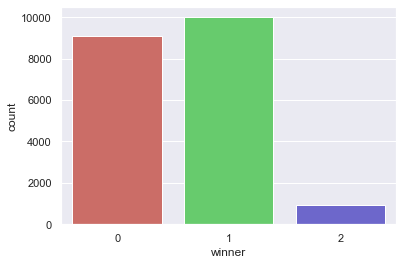

In [109]:
sns.countplot(x='winner', data=df, palette='hls')

In [110]:
x = scale(df_novo)

In [111]:
reg_logi = LogisticRegression().fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [112]:
print(reg_logi.score(x,y))

0.6205005484096121


In [121]:
coeficiente_angular = reg_logi.coef_[0]
coeficiente_linear = reg_logi.intercept_[2]

In [122]:
coeficiente_angular[0]

-1.0739604213929672

In [123]:
coeficiente_linear

-3.0198176514551793

In [124]:
reta = coeficiente_angular* x + coeficiente_linear


ValueError: x and y must be the same size

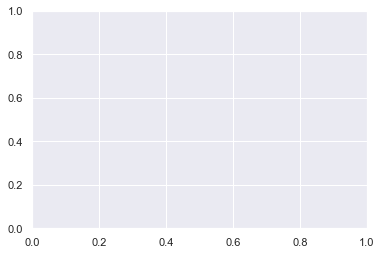

In [127]:
plt.scatter(x,y)
plt.plot(x, reta, label='ajuste linerar', color='red')